In [1]:
import numpy as np

In [10]:
rand = np.random.RandomState(69)

In [11]:
# X is an array containing 10 adta points
X = rand.rand(10,2)

In [12]:
X

array([[0.29624916, 0.80906772],
       [0.35025253, 0.78940926],
       [0.56134898, 0.25358895],
       [0.10497708, 0.05846073],
       [0.67329238, 0.69782966],
       [0.73278321, 0.78787406],
       [0.07637632, 0.3176806 ],
       [0.74102328, 0.32849423],
       [0.47014548, 0.18108572],
       [0.3235044 , 0.45490616]])

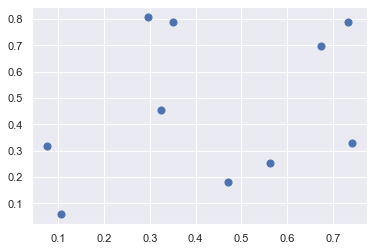

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # default seaborn plot style
plt.scatter(X[:,0], X[:,1], s=50)

In [19]:
# np.newaxis사용 -> 브로드캐스팅 연산
print(X[:, np.newaxis, :])
print(X[:, np.newaxis, :].shape)
print(X[np.newaxis, :, :])
print(X[np.newaxis, :, :].shape)

[[[0.29624916 0.80906772]]

 [[0.35025253 0.78940926]]

 [[0.56134898 0.25358895]]

 [[0.10497708 0.05846073]]

 [[0.67329238 0.69782966]]

 [[0.73278321 0.78787406]]

 [[0.07637632 0.3176806 ]]

 [[0.74102328 0.32849423]]

 [[0.47014548 0.18108572]]

 [[0.3235044  0.45490616]]]
(10, 1, 2)
[[[0.29624916 0.80906772]
  [0.35025253 0.78940926]
  [0.56134898 0.25358895]
  [0.10497708 0.05846073]
  [0.67329238 0.69782966]
  [0.73278321 0.78787406]
  [0.07637632 0.3176806 ]
  [0.74102328 0.32849423]
  [0.47014548 0.18108572]
  [0.3235044  0.45490616]]]
(1, 10, 2)


In [27]:
# dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

# 각 쌍의 점 사이의 좌표 차이를 계산함
differences = X[: ,np.newaxis, :] - X[np.newaxis, :, :]
print(differences.shape)

# 좌표 차이를 제곱함
sq_differences = differences ** 2
print(sq_differences.shape)

# 제곱 거리를 구하기 위해 좌표 차이를 더함
dist_sq = sq_differences.sum(-1)
print(dist_sq.shape)

(10, 10, 2)
(10, 10, 2)
(10, 10)


In [28]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 1 9 4 5 6 2 8 7 3]
 [1 0 9 4 5 6 2 7 8 3]
 [2 8 7 9 4 6 3 5 1 0]
 [3 6 8 9 2 7 1 0 4 5]
 [4 5 1 7 0 9 2 8 6 3]
 [5 4 1 0 7 9 2 8 6 3]
 [6 3 9 8 2 0 1 7 4 5]
 [7 2 8 4 9 5 1 0 6 3]
 [8 2 7 9 3 6 4 1 0 5]
 [9 6 8 2 1 0 4 7 3 5]]


In [34]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)
print(nearest_partition)

[[1 0 9 4 5 6 2 7 8 3]
 [1 0 9 4 5 6 2 7 8 3]
 [2 8 7 9 4 5 6 1 3 0]
 [3 6 8 9 2 7 1 0 5 4]
 [4 5 1 7 0 3 6 2 8 9]
 [1 4 5 0 3 2 6 7 8 9]
 [3 6 9 8 2 0 5 7 1 4]
 [2 7 8 4 9 5 6 1 3 0]
 [8 2 7 9 3 6 4 5 1 0]
 [8 6 9 2 1 0 5 7 3 4]]


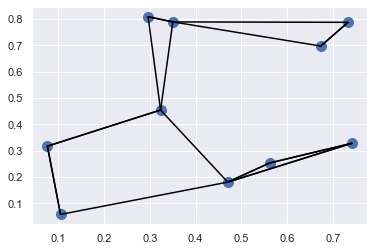

In [35]:
plt.scatter(X[:,0], X[:,1], s=100)
# 각 점을 두개의 가장 가까운 이웃과 선으로 이음
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # X[i]부터 X[j]까지 선으로 이음
        # zip 매직 함수를 이용함
        plt.plot(*zip(X[j], X[i]), color="black")